In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices_bangalore.csv')
df.sample(2)

,area,bedrooms,price
8,1310,3,50.0
5,1170,2,38.0


In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
# sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis = 'columns'))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [27]:
df['price'].shape

(20,)

In [28]:
scaled_y = sx.fit_transform(df['price'].values.reshape(df.shape[0], 1))
 
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [30]:
scaled_y.reshape(scaled_y.shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [21]:
# price = w1*area + w2*bedrooms + bias

In [7]:
scaled_X.shape[1]

2

In [8]:
scaled_X.shape[0]

20

In [9]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01) : 
    number_of_features = X.shape[1]
    
    w=np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    for i in range(epochs) :
        y_predicted = np.dot(w, X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted)) # 2 ??
        b_grad = -(2/total_samples)*np.sum(y_true- y_predicted)
        
        w = w- learning_rate*w_grad
        b = b-learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0 :
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost
    

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

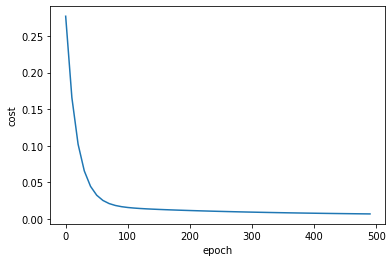

In [10]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [11]:
def predict(area, bedrooms, w, b) : 
    scaled_X = sx.transform([[area, bedrooms]])[0] # [0] ??
    scaled_y = w[0]*scaled_X[0] +w[1]*scaled_X[1] +b
    
    return sy.inverse_transform([[scaled_y]])[0][0]

predict(2600, 4, w, b)

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [12]:
predict(1000, 2, w, b)

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [13]:
# Stochastic Gradient Descent

In [33]:
import random
random.randint(0, 6)

3

In [15]:
def SGD(X, y_true, epochs, learning_rate = 0.01) : 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features
    w=np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    for i in range(epochs) :
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted)) # 2 ??
        b_grad = -(2/total_samples)*(sample_y- y_predicted)
        
        w = w- learning_rate*w_grad
        b = b-learning_rate*b_grad
        
        cost = (np.square(sample_y-y_predicted))
        
        if i%100==0 :
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [16]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.70185708, 0.67296095]), -0.22775916659396675, 0.0003406394135653566)

In [17]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

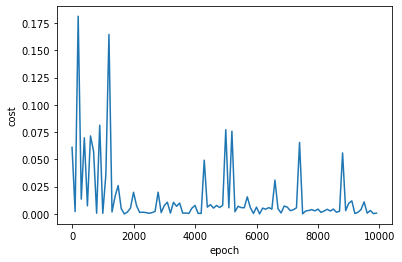

In [18]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [19]:
predict(2600, 4, w_sgd, b_sgd)

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.20059163609181